In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('float_format', '{:f}'.format)

In [3]:
train = pd.read_csv('train.csv',thousands=',')
test = pd.read_csv('test.csv',thousands=',')

In [4]:
print(train.shape)
train.head()

(164309, 14)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.000000,not verified,car,18.370000,0,nan,9,14,Female,1
1,10000002,30000,4 years,Mortgage,nan,VERIFIED - income,debt_consolidation,14.930000,0,17.000000,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.880000,0,nan,12,16,Male,3
3,10000004,16000,< 1 year,NaN,56160.000000,VERIFIED - income source,debt_consolidation,14.340000,3,nan,16,22,Male,3
4,10000005,17000,8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.170000,1,nan,19,30,Female,1


In [5]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.dtypes

Loan_ID                      int64
Loan_Amount_Requested        int64
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [7]:
category = []
for col in train.columns:
    if train[col].dtypes == 'object':
        category.append(col)
category

['Length_Employed',
 'Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender']

In [8]:
train['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

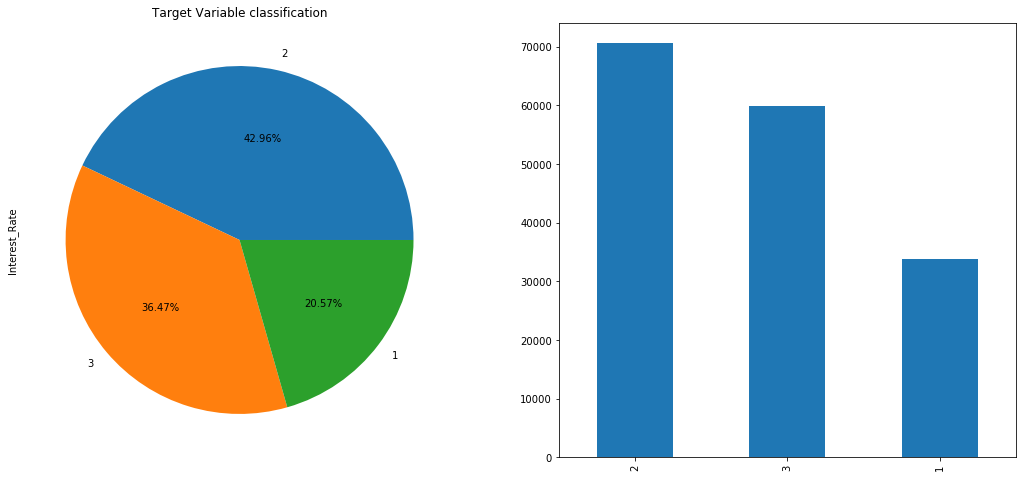

In [9]:
#f,ax = plt.subplots(1,2,figsize = (18,8))
plt.subplot(121)
train['Interest_Rate'].value_counts().plot.pie(autopct = '%1.2f%%',figsize = (18,8),title = 'Target Variable classification')
plt.subplot(122)
train['Interest_Rate'].value_counts().plot.bar(figsize = (18,8))

categorical variables:
    Nominal:
        'Home_Owner','Income_Verified','Purpose_Of_Loan','Gender'
    Ordinal:
        'Length_Employed', Inquiries_Last_6Mo

Continous:
    Loan_Amount_Requested        
    Annual_Income              
    Debt_To_Income                        
    Months_Since_Deliquency    
    Number_Open_Accounts         
    Total_Accounts               




In [10]:
cont_col = ['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Months_Since_Deliquency','Number_Open_Accounts',
 'Total_Accounts']
ord_col = ['Length_Employed', 'Inquiries_Last_6Mo']
nom_col = ['Home_Owner','Income_Verified','Purpose_Of_Loan','Gender']

Figure(432x288)


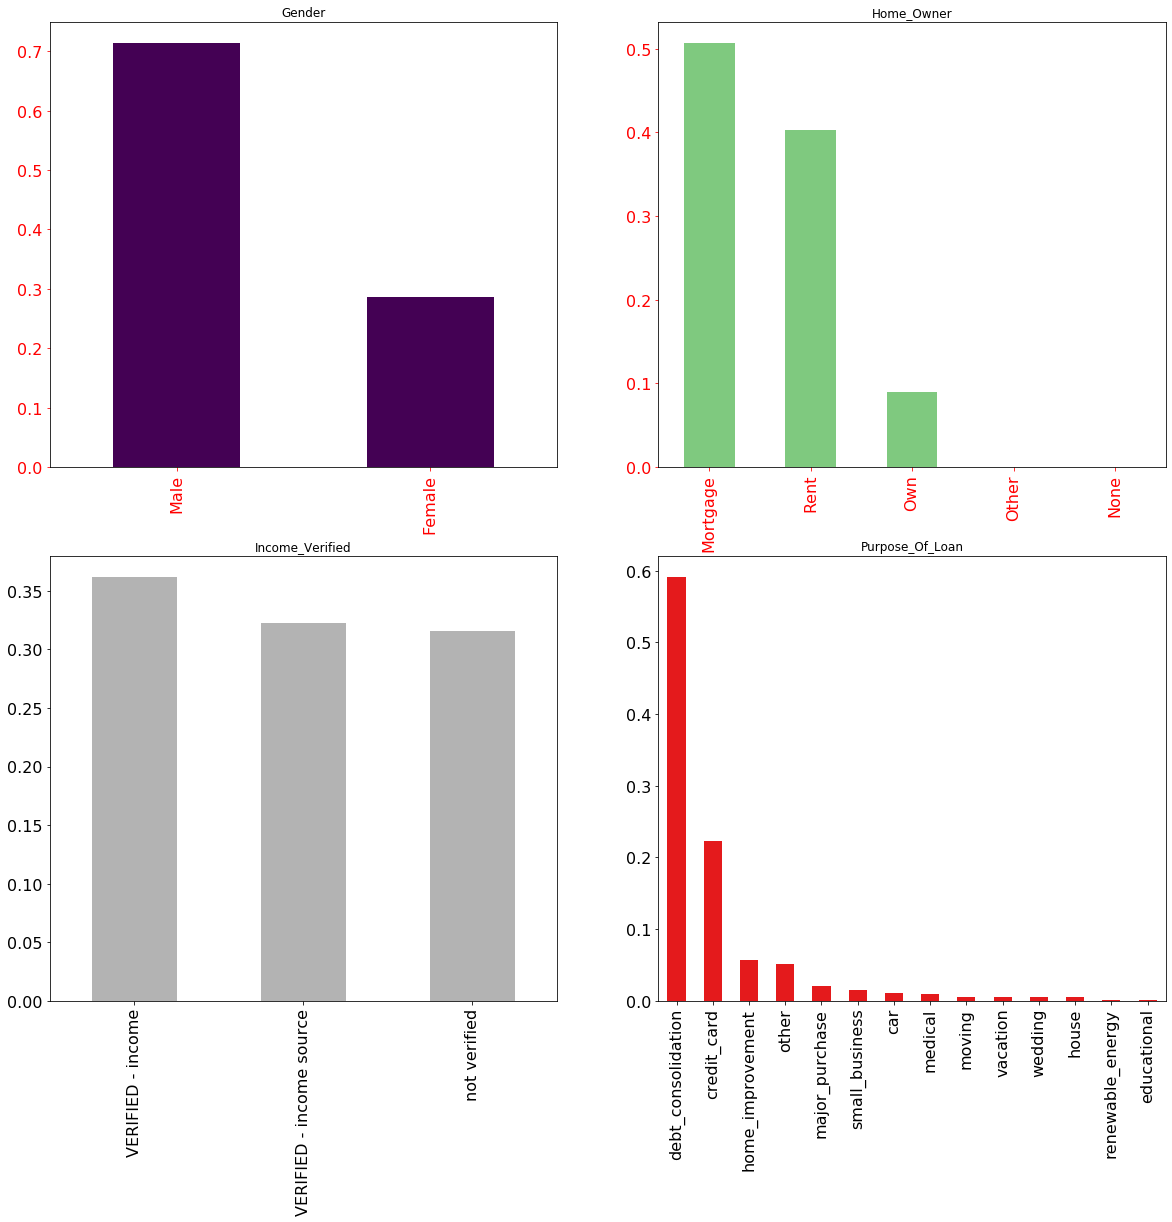

In [11]:
#Independent Variable (Categorical)
#'Home_Owner','Income_Verified','Purpose_Of_Loan','Gender'
print(plt.figure(1) )
ax = plt.subplot(221) 
#ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,18), title= 'Gender',colormap = 'viridis',fontsize = 16) 
ax = plt.subplot(222)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
train['Home_Owner'].value_counts(normalize=True).plot.bar(title= 'Home_Owner',colormap = 'Accent',fontsize = 16) 
plt.subplot(223) 
train['Income_Verified'].value_counts(normalize=True).plot.bar(title= 'Income_Verified',colormap = 'Set2_r',fontsize = 16) 
plt.subplot(224) 
train['Purpose_Of_Loan'].value_counts(normalize=True).plot.bar(title= 'Purpose_Of_Loan',colormap = 'Set1',fontsize = 16) 
plt.show()
ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')

In [12]:
## 'Loan_Amount_Requested','Length_Employed'
#Inquiries_Last_6Mo, Number_Open_Accounts,Total_Accounts               int64
#Independent Variable (Ordinal)
print(train['Length_Employed'].unique())
print(train['Inquiries_Last_6Mo'].unique())
print(train['Number_Open_Accounts'].unique())
print(train['Total_Accounts'].unique())

['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']
[0 3 1 2 4 5 6 7 8]
[ 9 12 16 19 25  8 24  7  5 20 10 15  6 14 11 29  4 13 21  3 22 18 26 17
  2 27 23 31 32 33 35 28 36 30 34 44 37 39  1 40  0 38 62 42 43 41 49 47
 50 45 48 58 53 76 46 54 51 52]
[ 14  24  16  22  30  15  12  31   9  43  13  17  28  26  21  20  34  27
  10  44  25   8   7  19  41  18  11  65   6  29  23  37  32  45  38  36
  71  40  42  51  53  35  47  39  54  46  33  58  49  59  62   4  69  60
  52  56  48   5  63   3  50  55  61  57  64  76   2  75  67  66  70  77
  86  68  72  90  89  81  98  73 105  74  79  85  82  80  93  78  87  88
  91  84  83  94 156 102 116  97  92  99]


Figure(432x288)


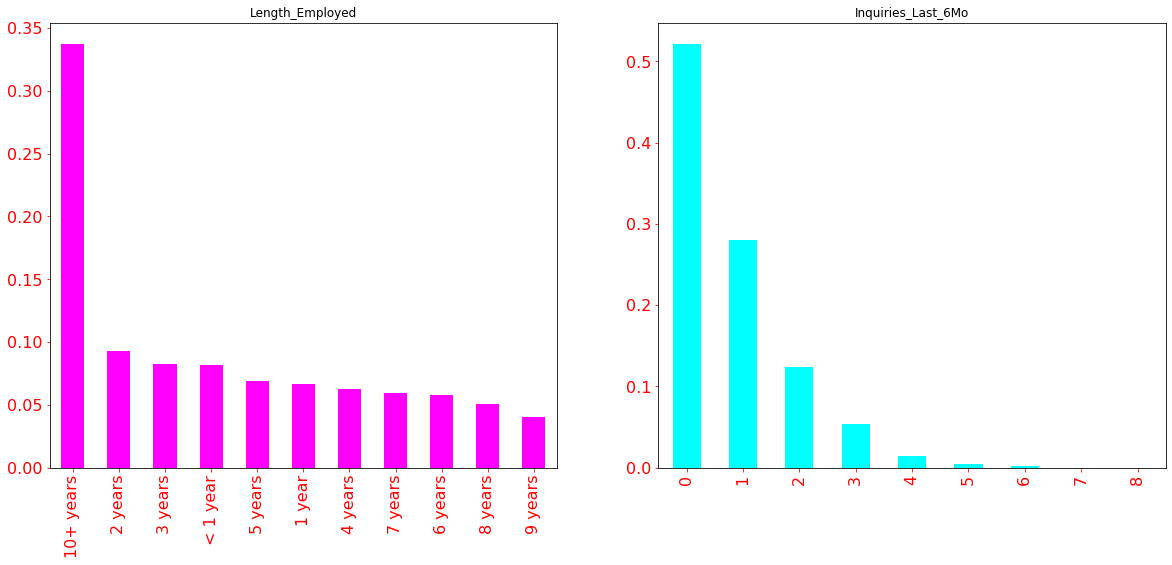

In [13]:
#Independent Variable (Ordinal)
#'Length_Employed', Inquiries_Last_6Mo
print(plt.figure(1) )
ax = plt.subplot(221) 
#ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
train['Length_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,18), title= 'Length_Employed',colormap = 'spring',fontsize = 16) 
ax = plt.subplot(222) 
#ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
train['Inquiries_Last_6Mo'].value_counts(normalize=True).plot.bar(figsize=(20,18), title= 'Inquiries_Last_6Mo',colormap = 'cool',fontsize = 16) 


#Independent Variable (Numerical)
#Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.
#Loan_Amount_Requested,Annual_Income,Debt_To_Income,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts               


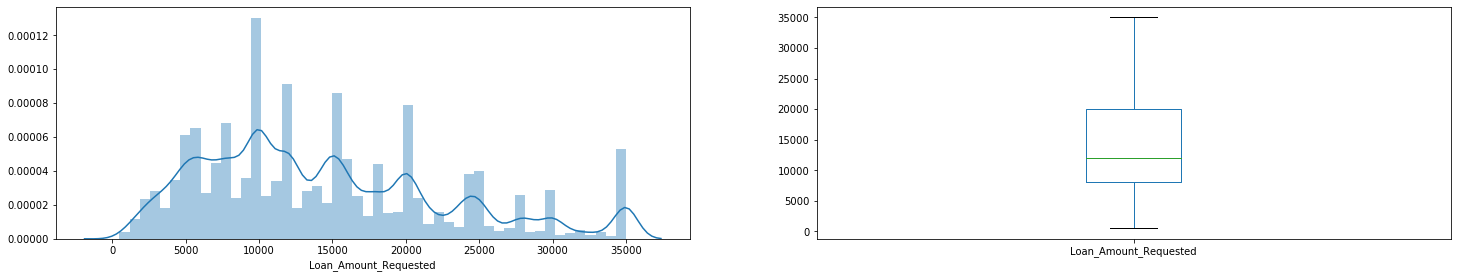

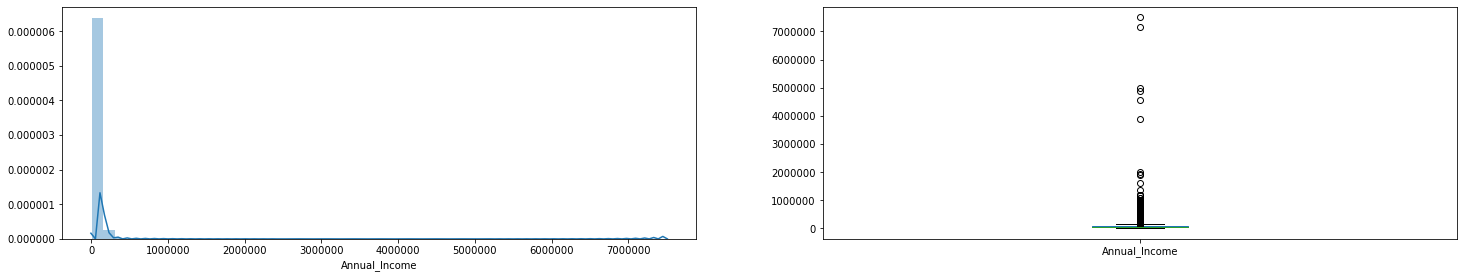

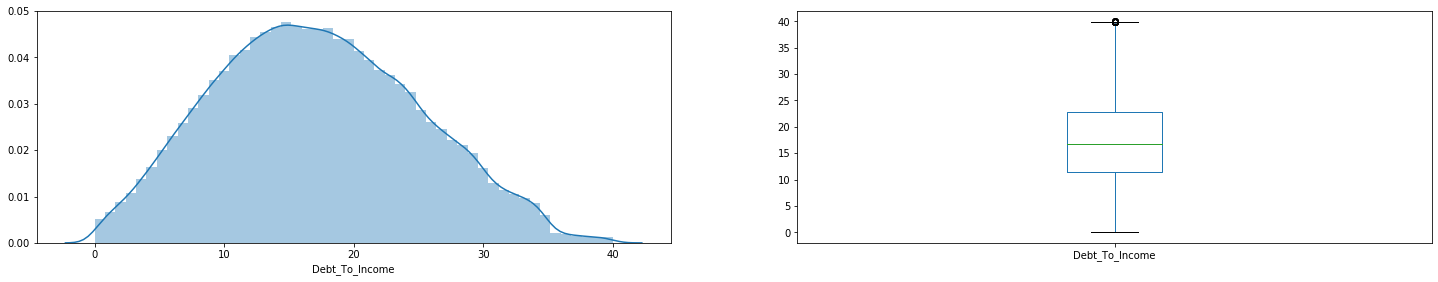

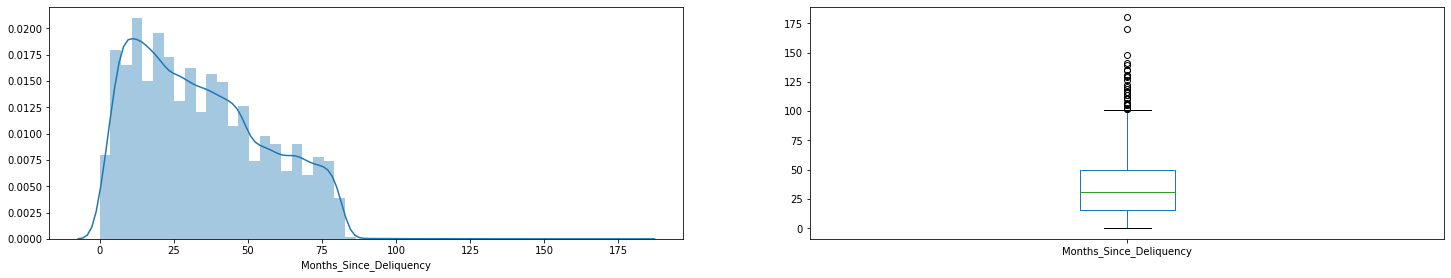

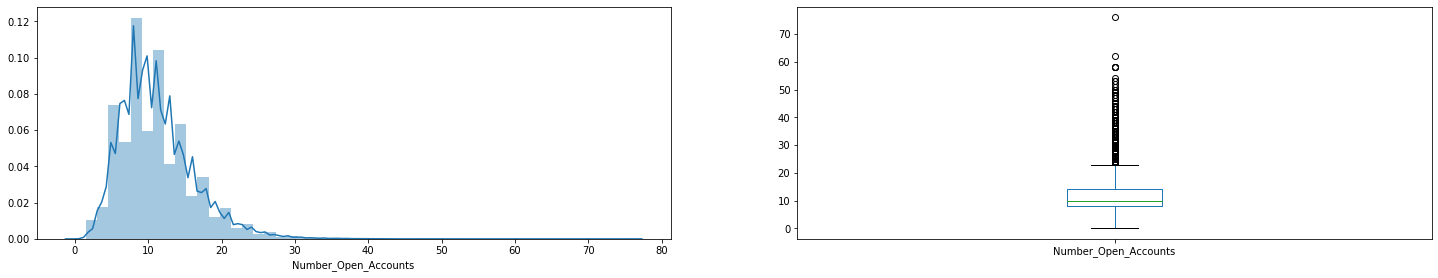

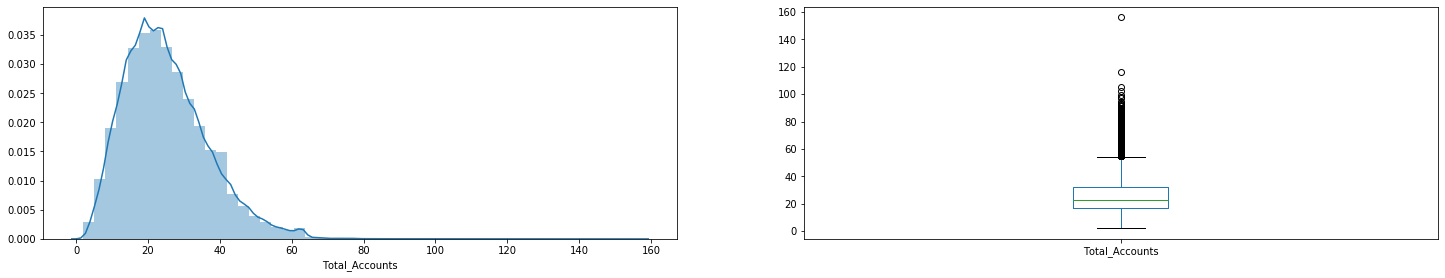

In [14]:

i = 1

for col in cont_col:
    plt.figure(figsize = (25,35))
    plt.subplot(7,2,i)
    sns.distplot(train[col]); 
    plt.subplot(7,2,i+1) 
    train[col].plot.box()
    i += 2
    plt.show()

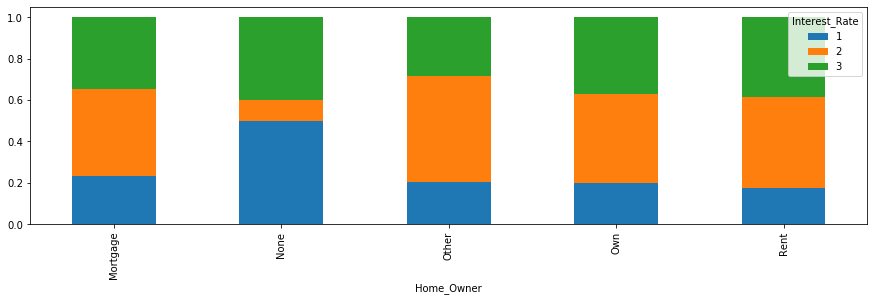

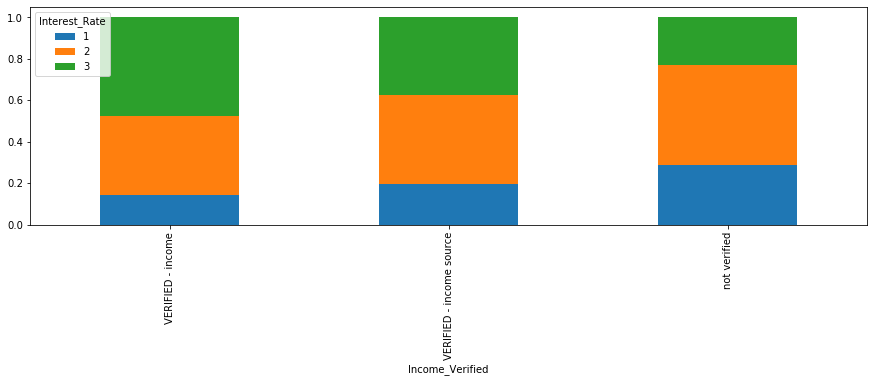

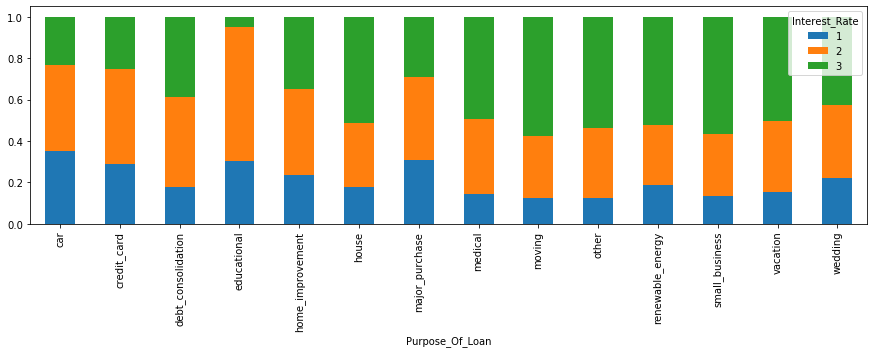

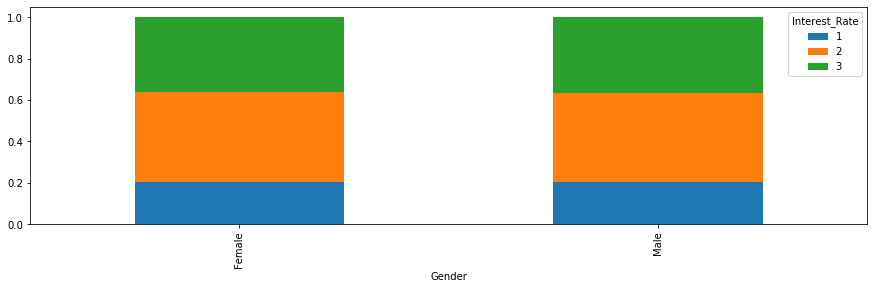

In [15]:
for col in nom_col:
    Gender=pd.crosstab(train[col],train['Interest_Rate']) 
    #print(Gender)
    Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))

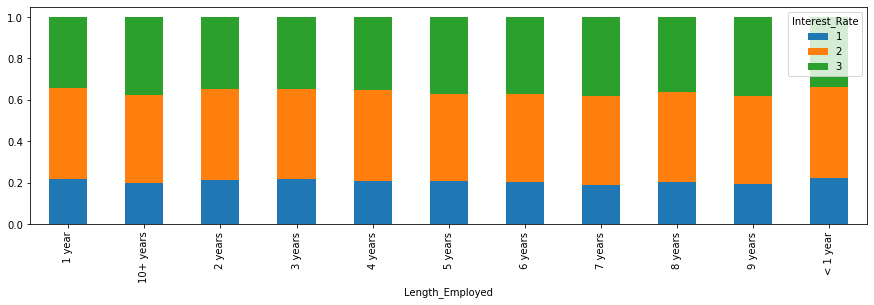

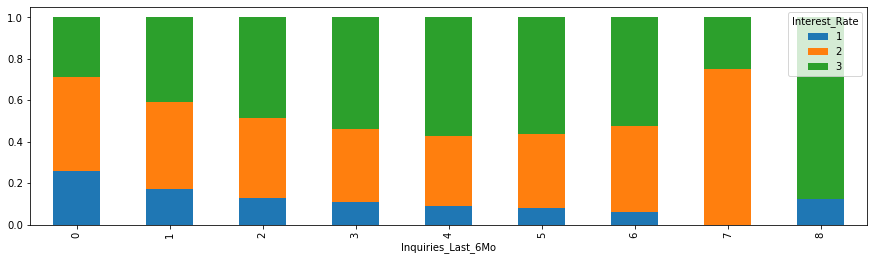

In [16]:
for col in ord_col:
    Gender=pd.crosstab(train[col],train['Interest_Rate']) 
    #print(Gender)
    Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))

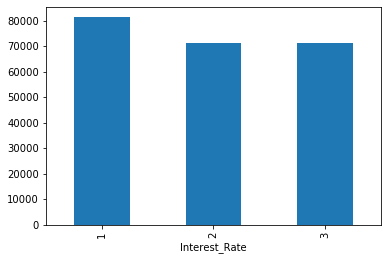

In [17]:
train.groupby('Interest_Rate')['Annual_Income'].mean().plot.bar()

In [18]:
print(train['Annual_Income'].max())
print(train['Annual_Income'].min())
print(train['Annual_Income'].mean())

7500000.0
4000.0
73331.15943386468


In [19]:
bins=[0,100000,500000,1000000,7600000] 
group=['Low','Average','High', 'Very high'] 
train['Annual_Income_bin']=pd.cut(train['Annual_Income'],bins,labels=group)

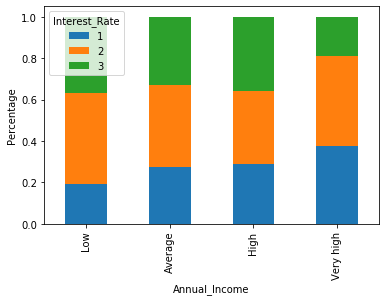

In [20]:
Annual_Income_bin=pd.crosstab(train['Annual_Income_bin'],train['Interest_Rate']) 
Annual_Income_bin.div(Annual_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Annual_Income') 
P = plt.ylabel('Percentage')

In [21]:
train.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.000000,164309.000000,139207.000000,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,10082155.000000,14349.336920,73331.159434,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,47432.067027,8281.868700,60377.498294,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,10000001.000000,500.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,10041078.000000,8000.000000,45000.000000,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,10082155.000000,12075.000000,63000.000000,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,10123232.000000,20000.000000,88697.500000,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,10164309.000000,35000.000000,7500000.000000,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


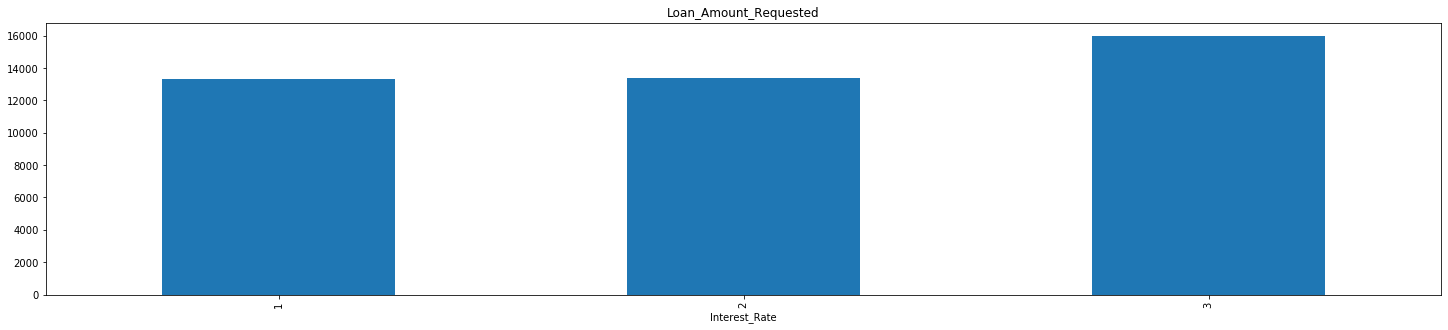

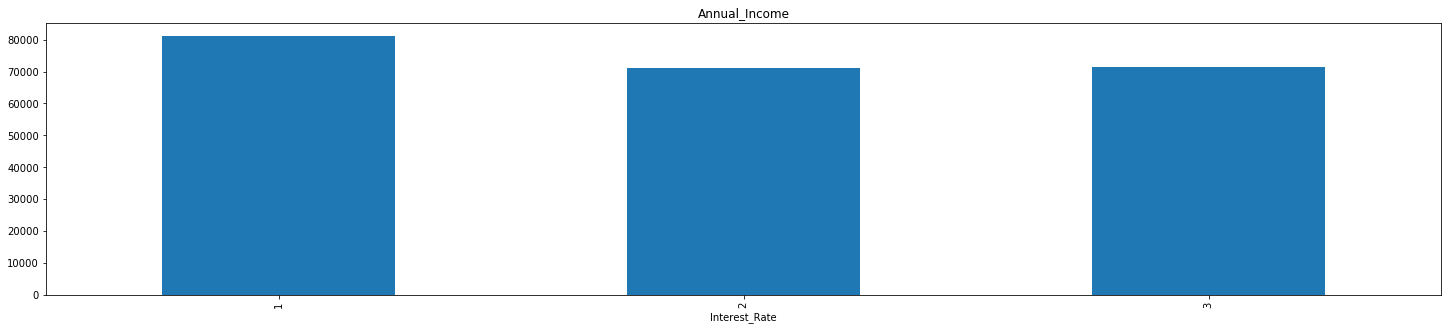

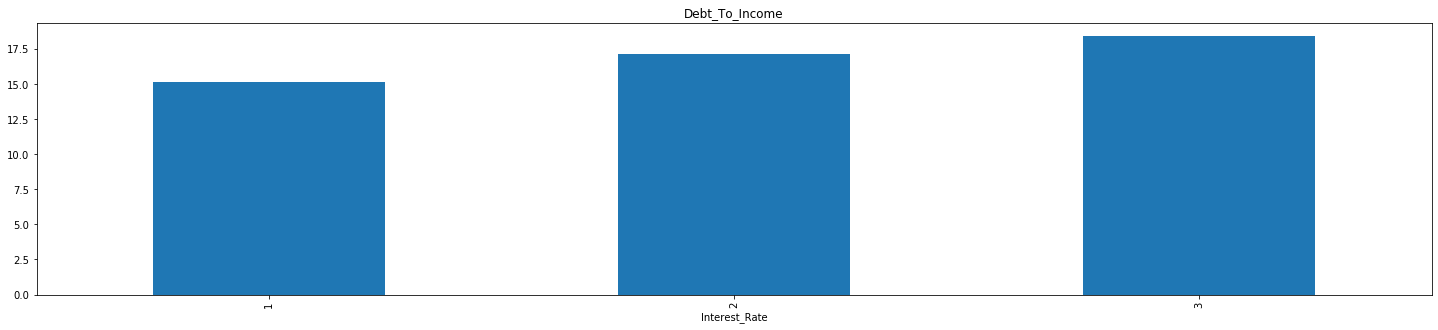

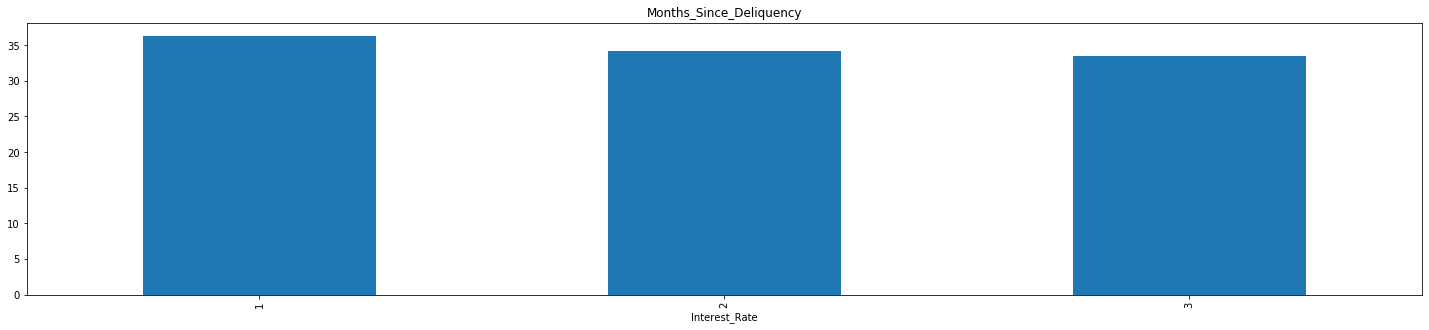

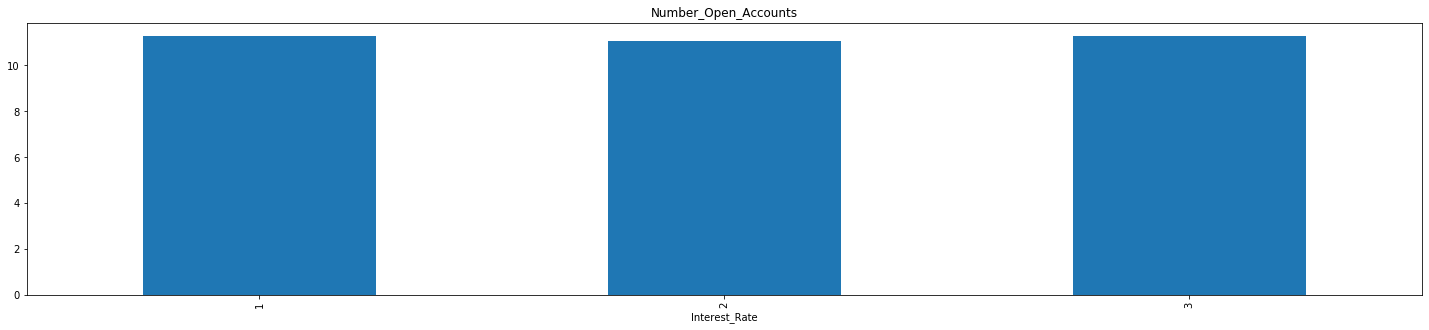

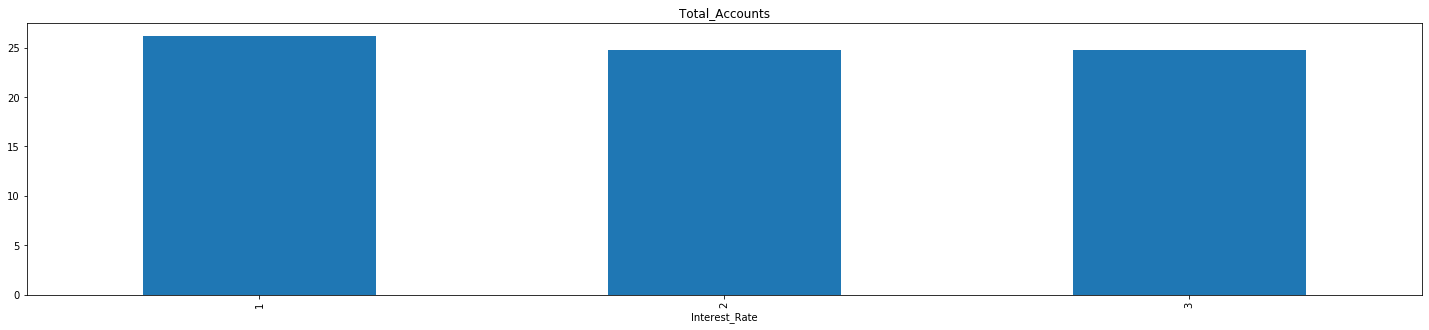

In [22]:
i = 1
for col in cont_col:
    plt.figure(figsize = (25,35))
    plt.subplot(len(cont_col),1,i)
    train.groupby('Interest_Rate')[col].mean().plot.bar(title = col)
    i += 1

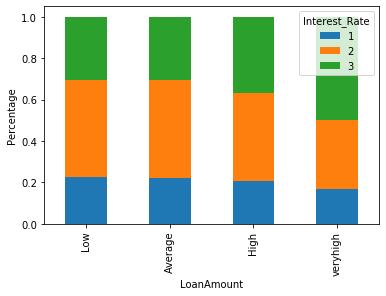

In [23]:
bins=[0,8000,12000,20000,36000] 
group=['Low','Average','High','veryhigh'] 
train['LoanAmount_bin']=pd.cut(train['Loan_Amount_Requested'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Interest_Rate']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [24]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate', 'Annual_Income_bin',
       'LoanAmount_bin'],
      dtype='object')

In [25]:
train['Length_Employed'].str.extract('(\d+)')


,0
0,1
1,4
2,7
3,1
4,8
5,2
6,4
7,1
8,10
9,10


In [26]:
#train=train.drop(['Annual_Income_bin', 'LoanAmount_bin'], axis=1)
train['Length_Employed'] = train['Length_Employed'].str.extract('(\d+)').astype('int64',errors='ignore')
test['Length_Employed'] = test['Length_Employed'].str.extract('(\d+)').astype('int64',errors='ignore')


In [27]:
train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Annual_Income_bin,LoanAmount_bin
0,10000001,7000,1,Rent,68000.000000,not verified,car,18.370000,0,nan,9,14,Female,1,Low,Low
1,10000002,30000,4,Mortgage,nan,VERIFIED - income,debt_consolidation,14.930000,0,17.000000,12,24,Female,3,NaN,veryhigh
2,10000003,24725,7,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.880000,0,nan,12,16,Male,3,Low,veryhigh
3,10000004,16000,1,NaN,56160.000000,VERIFIED - income source,debt_consolidation,14.340000,3,nan,16,22,Male,3,Low,High
4,10000005,17000,8,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.170000,1,nan,19,30,Female,1,Low,High
5,10000006,4500,2,Rent,30000.000000,VERIFIED - income source,credit_card,10.880000,1,nan,12,15,Male,3,Low,Low
6,10000007,18075,4,Rent,85000.000000,VERIFIED - income,debt_consolidation,5.650000,0,nan,9,12,Male,3,Low,High
7,10000008,15000,1,Rent,115000.000000,VERIFIED - income,debt_consolidation,7.970000,1,16.000000,25,31,Female,2,Average,High
8,10000009,6300,10,Rent,nan,not verified,debt_consolidation,16.120000,3,nan,8,9,Female,3,NaN,Low
9,10000010,30000,10,Own,163000.000000,VERIFIED - income,debt_consolidation,11.130000,0,nan,24,43,Male,1,Average,veryhigh


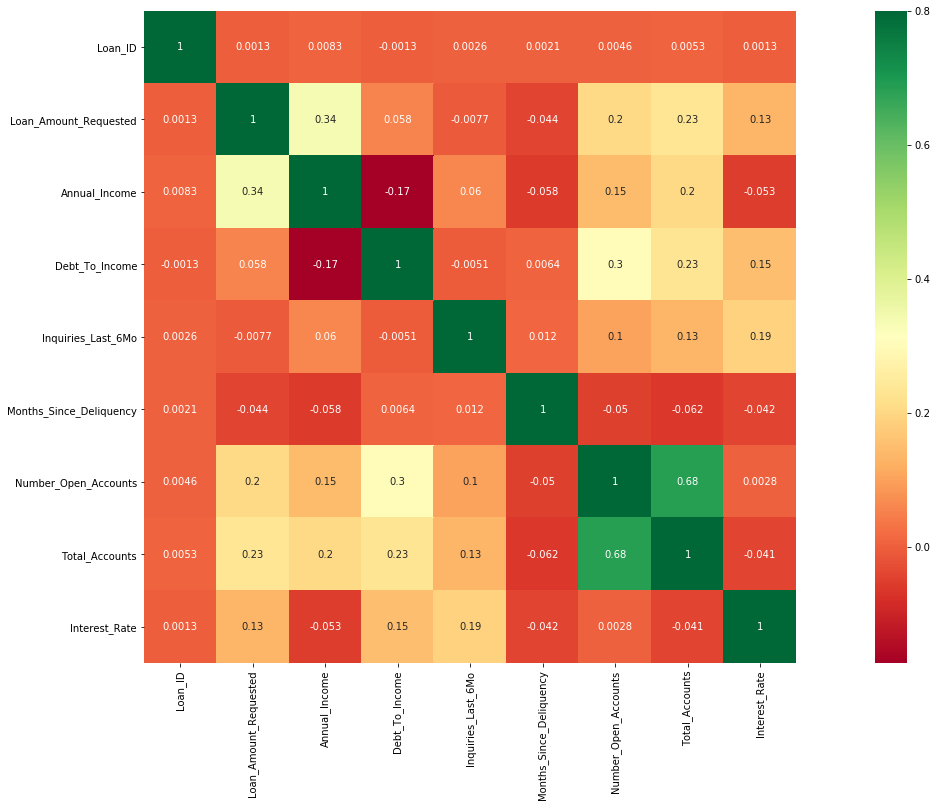

In [28]:
 
f, ax = plt.subplots(figsize=(28, 12)) 
sns.heatmap(train.corr(), vmax=.8, square=True, cmap="RdYlGn",annot = True);

## Handle Null Values

In [29]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
Annual_Income_bin          25102
LoanAmount_bin                 0
dtype: int64

In [30]:
test.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [31]:
train.drop('Months_Since_Deliquency',axis = 1,inplace = True)
test.drop('Months_Since_Deliquency',axis = 1,inplace = True)

In [32]:
train['Length_Employed'].value_counts()
train['Home_Owner'].value_counts()


Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [33]:
train['Length_Employed'].fillna(train['Length_Employed'].mode()[0],inplace = True)
train['Home_Owner'].fillna(train['Home_Owner'].mode()[0],inplace = True)

test['Length_Employed'].fillna(train['Length_Employed'].mode()[0],inplace = True)
test['Home_Owner'].fillna(train['Home_Owner'].mode()[0],inplace = True)

In [34]:
train['Annual_Income'].fillna(train['Annual_Income'].median(),inplace = True)
test['Annual_Income'].fillna(train['Annual_Income'].median(),inplace = True)

# Outliers

In [35]:
minvalue=min(train['Annual_Income'])
maxvalue=max(train['Annual_Income'])
meanvalue=np.mean(train['Annual_Income'])
medianvalue=np.median(train['Annual_Income'])

points=[minvalue, maxvalue, meanvalue, medianvalue]
names=["min","max","mean","mid"]

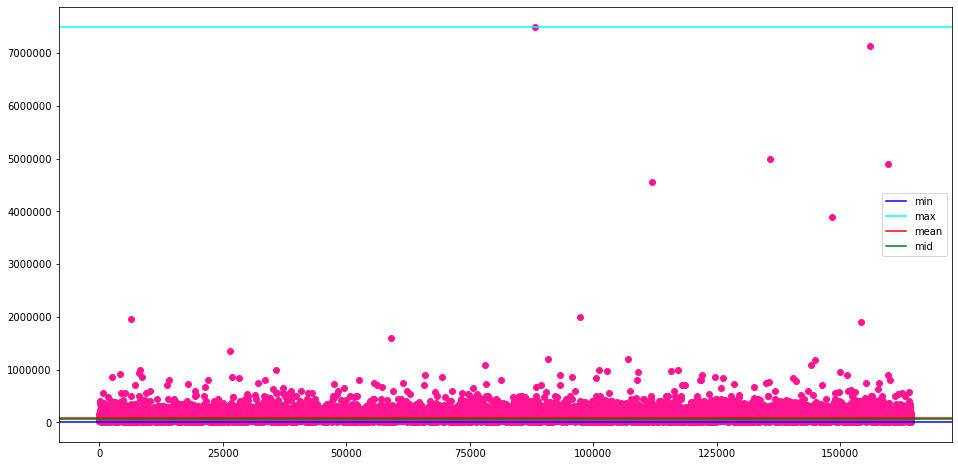

In [36]:
#Lets see scatter plot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train.index,train['Annual_Income'],color = 'deeppink')
ax.axhline(y=minvalue, label="min",color='blue')
ax.axhline(y=maxvalue, label="max",color='cyan')
ax.axhline(y=meanvalue, label="mean",color='red')
ax.axhline(y=medianvalue, label="mid",color='green')
ax.legend()

In [37]:
#Lets see Z-score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train['Annual_Income']))
print(z)

[0.06737783 0.15714705 0.06846814 ... 0.15714705 0.15714705 0.15714705]


In [38]:
threshold = 3
print(np.where(z > 3))

(array([    98,    177,    292, ..., 164066, 164101, 164112]),)


In [39]:
z[98]

5.893298454755342

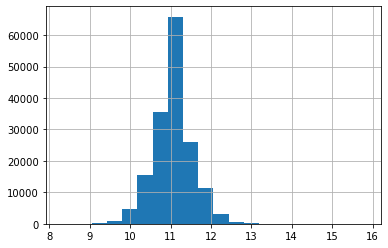

In [40]:
train['Annual_Income_log'] = np.log(train['Annual_Income']) 
train['Annual_Income_log'].hist(bins=20) 
test['Annual_Income_log'] = np.log(test['Annual_Income'])

In [41]:
train[['Annual_Income','Annual_Income_log']].sort_values('Annual_Income')

,Annual_Income,Annual_Income_log
29808,4000.000000,8.294050
137615,4000.000000,8.294050
113045,4200.000000,8.342840
151827,4800.000000,8.476371
32343,4800.000000,8.476371
121250,4888.000000,8.494539
110754,5000.000000,8.517193
83684,6000.000000,8.699515
12692,6000.000000,8.699515
7701,6000.000000,8.699515


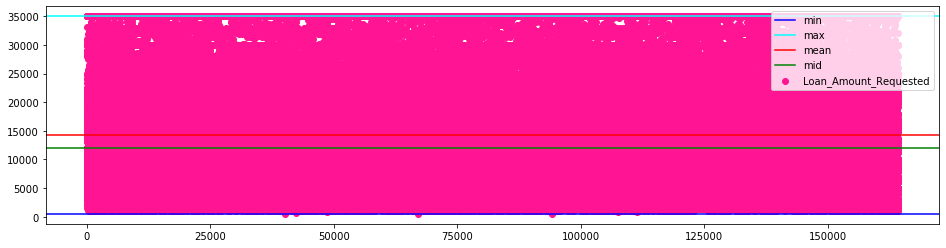

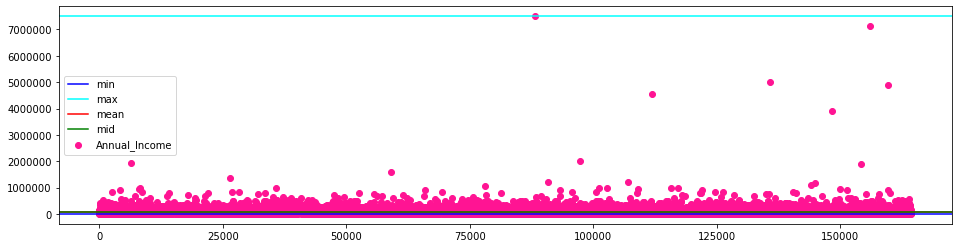

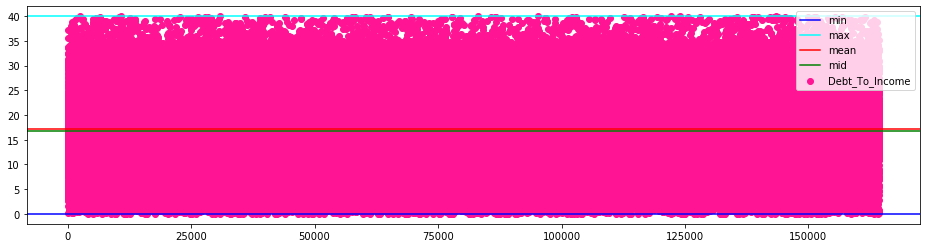

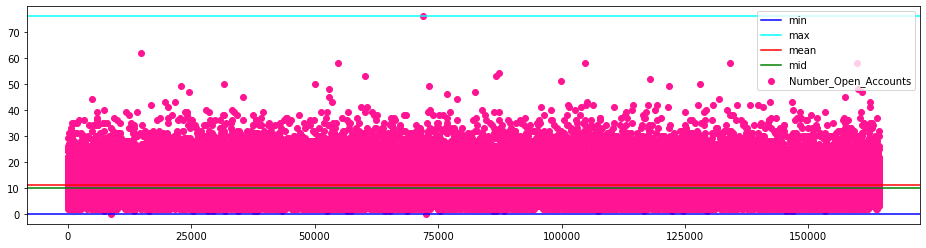

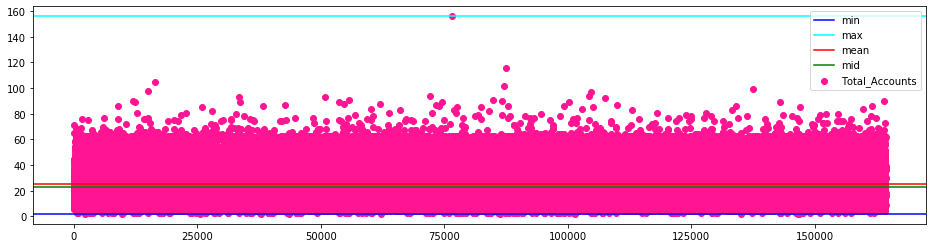

In [42]:
#Lets see scatter plot
cont_col.remove('Months_Since_Deliquency')
for col in cont_col:
    minvalue=min(train[col])
    maxvalue=max(train[col])
    meanvalue=np.mean(train[col])
    medianvalue=np.median(train[col])

    #points=[minvalue, maxvalue, meanvalue, medianvalue]
    #names=["min","max","mean","mid"]
    fig, ax = plt.subplots(figsize=(16,4))
    ax.scatter(train.index,train[col],color = 'deeppink',label = col)
    ax.axhline(y=minvalue, label="min",color='blue')
    ax.axhline(y=maxvalue, label="max",color='cyan')
    ax.axhline(y=meanvalue, label="mean",color='red')
    ax.axhline(y=medianvalue, label="mid",color='green')
    ax.legend()

In [43]:
threshold = 3
for col in cont_col:
    z = np.abs(stats.zscore(train[col]))
    outlier = np.where(z > threshold)
    print("No. of outliers in ",col,":",len(outlier[0]))
    print(outlier[0])
    print()

#type(outlier[0])

No. of outliers in  Loan_Amount_Requested : 0
[]

No. of outliers in  Annual_Income : 1465
[    98    177    292 ... 164066 164101 164112]

No. of outliers in  Debt_To_Income : 0
[]

No. of outliers in  Number_Open_Accounts : 1671
[    31    233    270 ... 163922 164174 164235]

No. of outliers in  Total_Accounts : 1576
[    47    117    339 ... 164235 164260 164307]



In [44]:
train['Annual_Income'][177]

350000.0

In [45]:
#Annual Income outliered values
train[(np.abs(stats.zscore(train['Annual_Income'])) > 3)]['Annual_Income'].sort_values()

64435     239000.000000
154441    239000.000000
57369     240000.000000
69920     240000.000000
69967     240000.000000
130640    240000.000000
154177    240000.000000
73193     240000.000000
73323     240000.000000
129843    240000.000000
154533    240000.000000
154580    240000.000000
75183     240000.000000
18306     240000.000000
128147    240000.000000
23291     240000.000000
106073    240000.000000
126353    240000.000000
78202     240000.000000
125061    240000.000000
81516     240000.000000
13487     240000.000000
12713     240000.000000
122895    240000.000000
11827     240000.000000
122777    240000.000000
86182     240000.000000
87447     240000.000000
121020    240000.000000
89968     240000.000000
              ...      
93341     900000.000000
151287    900000.000000
122006    900000.000000
65911     900009.000000
4154      920000.000000
7921      932000.000000
149985    948000.000000
109039    950000.000000
102658    980000.000000
115644    980000.000000
101043    991000

In [46]:
#Annual Income outliered values
train[(np.abs(stats.zscore(train['Number_Open_Accounts'])) > 3)]['Number_Open_Accounts'].sort_values()

136079    27
122440    27
78488     27
78550     27
30841     27
149443    27
78601     27
30700     27
46507     27
30436     27
149230    27
46673     27
30167     27
30163     27
121944    27
61437     27
29988     27
61261     27
121707    27
46935     27
61247     27
30220     27
78272     27
31352     27
122501    27
62604     27
147724    27
76198     27
147807    27
45902     27
          ..
146696    43
78820     44
131920    44
4908      44
35616     45
157419    45
52839     45
76757     46
82490     47
24656     47
160917    47
53013     48
160045    48
73161     49
22974     49
121846    49
31677     50
127963    50
50025     50
99799     51
117965    52
86731     53
60159     53
87447     54
159794    58
104667    58
134036    58
54698     58
14930     62
72015     76
Name: Number_Open_Accounts, Length: 1671, dtype: int64

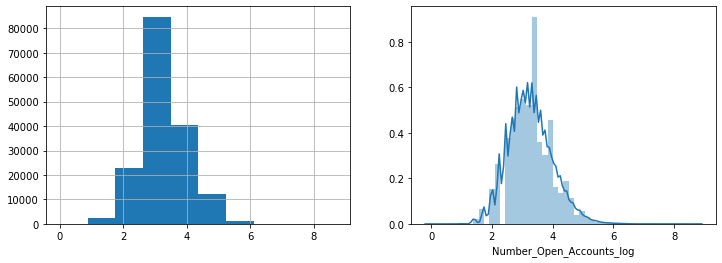

In [47]:
#As we have 0's in the sample, if we apply log those will be -inf, to overcome this we apply sqrt instead of log
train['Number_Open_Accounts_log'] = np.sqrt(train['Number_Open_Accounts'])
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Number_Open_Accounts_log'].hist() 
plt.subplot(1,2,2)
sns.distplot(train['Number_Open_Accounts_log'])
test['Number_Open_Accounts_log'] = np.sqrt(test['Number_Open_Accounts'])

In [48]:
train[['Number_Open_Accounts_log','Number_Open_Accounts']].sort_values('Number_Open_Accounts_log')

,Number_Open_Accounts_log,Number_Open_Accounts
8867,0.000000,0
72538,0.000000,0
13497,1.000000,1
57321,1.000000,1
31964,1.000000,1
28395,1.000000,1
116600,1.000000,1
56673,1.000000,1
146771,1.000000,1
52513,1.000000,1


In [49]:
train[(np.abs(stats.zscore(train['Total_Accounts'])) > 3)]['Total_Accounts'].sort_values()

123623     60
40119      60
39620      60
18191      60
18531      60
19021      60
114475     60
64690      60
77690      60
103235     60
19545      60
65185      60
19780      60
150150     60
77432      60
20363      60
65359      60
38708      60
65548      60
113927     60
103586     60
113922     60
38093      60
21317      60
21477      60
21510      60
113559     60
76991      60
63851      60
17999      60
         ... 
161522     86
38381      86
42817      87
109849     87
73288      87
61980      88
54698      88
142920     89
74600      89
33593      89
53604      89
12388      89
100252     89
163946     90
86623      90
12032      90
84922      91
55788      91
107474     92
33328      93
50907      93
104282     94
72015      94
104667     97
14930      98
137376     99
86968     102
16509     105
87447     116
76601     156
Name: Total_Accounts, Length: 1576, dtype: int64

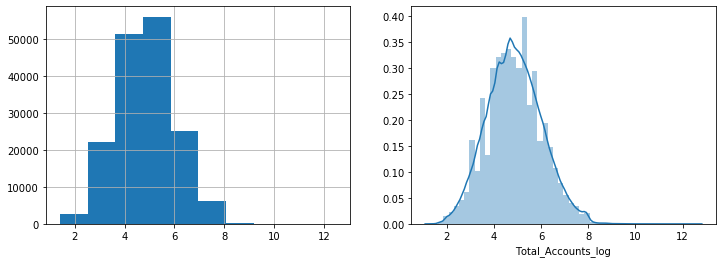

In [50]:
#As we have 0's in the sample, if we apply log those will be -inf, to overcome this we apply sqrt instead of log
train['Total_Accounts_log'] = np.sqrt(train['Total_Accounts'])
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train['Total_Accounts_log'].hist() 
plt.subplot(1,2,2)
sns.distplot(train['Total_Accounts_log'])
test['Total_Accounts_log'] = np.sqrt(test['Number_Open_Accounts'])

In [51]:
train[['Total_Accounts_log','Total_Accounts']].sort_values('Total_Accounts_log')

,Total_Accounts_log,Total_Accounts
2248,1.414214,2
101452,1.414214,2
62138,1.414214,2
86244,1.414214,2
146771,1.414214,2
43505,1.414214,2
135028,1.414214,2
9766,1.414214,2
25478,1.414214,2
146499,1.414214,2


In [52]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate', 'Annual_Income_bin', 'LoanAmount_bin',
       'Annual_Income_log', 'Number_Open_Accounts_log', 'Total_Accounts_log'],
      dtype='object')

## Model Building
Support Vector Machine (SVM)
k-Nearest Neighbors (KNN)
Bagged Decision Trees (BAG)
Random Forest (RF)
Extra Trees (ET)

In [53]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [54]:
test

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Annual_Income_log,Number_Open_Accounts_log,Total_Accounts_log
0,27500,10,Mortgage,129000.000000,VERIFIED - income,debt_consolidation,12.870000,0,10,37,Male,11.767568,3.162278,3.162278
1,26000,10,Mortgage,110000.000000,not verified,credit_card,11.370000,0,6,23,Male,11.608236,2.449490,2.449490
2,6075,1,Rent,75000.000000,VERIFIED - income,debt_consolidation,6.830000,2,5,20,Male,11.225243,2.236068,2.236068
3,12000,10,Mortgage,73000.000000,VERIFIED - income source,debt_consolidation,7.760000,0,6,8,Male,11.198215,2.449490,2.449490
4,35000,1,Mortgage,156000.000000,not verified,debt_consolidation,9.620000,0,9,21,Male,11.957611,3.000000,3.000000
5,8000,6,Mortgage,39432.000000,VERIFIED - income source,home_improvement,0.000000,2,2,3,Female,10.582333,1.414214,1.414214
6,12600,8,Mortgage,57408.000000,VERIFIED - income,debt_consolidation,22.890000,1,9,20,Male,10.957939,3.000000,3.000000
7,33425,1,Mortgage,75000.000000,VERIFIED - income,credit_card,20.860000,3,19,24,Female,11.225243,4.358899,4.358899
8,24625,10,Mortgage,56000.000000,VERIFIED - income source,debt_consolidation,10.930000,0,6,25,Male,10.933107,2.449490,2.449490
9,35000,10,Own,200000.000000,VERIFIED - income source,credit_card,18.520000,3,11,21,Male,12.206073,3.316625,3.316625


In [55]:
X = train.drop(['Interest_Rate','Total_Accounts','Number_Open_Accounts','Annual_Income','Annual_Income_bin','LoanAmount_bin'],1) 
y = train['Interest_Rate']
test = test.drop(['Total_Accounts','Number_Open_Accounts','Annual_Income'],1)

In [56]:
X.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Gender', 'Annual_Income_log',
       'Number_Open_Accounts_log', 'Total_Accounts_log'],
      dtype='object')

In [57]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [59]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
pred_cv = knn.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.4562716815775059

In [61]:
# accuracy on X_test 

accuracy = knn.score(x_cv, y_cv) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_cv)  
cm = confusion_matrix(y_cv, knn_predictions)

0.4562716815775059


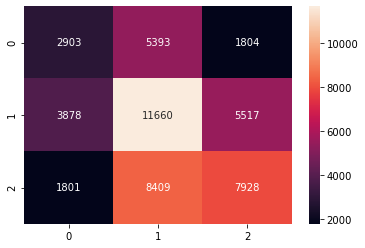

In [62]:
sns.heatmap(cm,annot=True,fmt = '')

In [63]:
pred_test = knn.predict(test)

In [64]:
submission=pd.read_csv("sample_submission.csv")
submission['Interest_Rate']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
submission.to_csv('knn.csv',index = False)
submission.head()

,Loan_ID,Interest_Rate
0,10164310,3
1,10164311,2
2,10164312,3
3,10164313,3
4,10164314,3


In [65]:
submission.to_csv('knn.csv',index = False)

In [66]:
from sklearn.model_selection import StratifiedKFold


1 of kfold 5
accuracy_score 0.4207899701783215

2 of kfold 5
accuracy_score 0.4191771651147222

3 of kfold 5
accuracy_score 0.4230418112105167

4 of kfold 5
accuracy_score 0.4201813644939444

5 of kfold 5
accuracy_score 0.419129058762667


In [68]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

    rf_test = model.predict(test)


1 of kfold 5
accuracy_score 0.5099202726553466

2 of kfold 5
accuracy_score 0.5171018197309963

3 of kfold 5
accuracy_score 0.513389325056296

4 of kfold 5
accuracy_score 0.5168279471730266

5 of kfold 5
accuracy_score 0.510696570402605


In [69]:
submission['Interest_Rate']=rf_test 
submission['Loan_ID']=test_original['Loan_ID']
submission.to_csv('rf1.csv',index = False)

In [70]:
rf = RandomForestClassifier(max_depth=10).fit(x_train, y_train) 
pred_cv = rf.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.5114722171505082

In [71]:
pred_test = rf.predict(test)

In [72]:
submission['Interest_Rate']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
submission.to_csv('rf1.csv',index = False)

In [73]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [74]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [75]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=181,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [76]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=181)    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    #pred2=model.predict_proba(test)[:,1]
    


1 of kfold 5
accuracy_score 0.5168888077414643

2 of kfold 5
accuracy_score 0.5227314223114844

3 of kfold 5
accuracy_score 0.5205708721319457

4 of kfold 5
accuracy_score 0.5214533503742925

5 of kfold 5
accuracy_score 0.5152308207297405
